- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

- https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import transforms, models
from torch.utils.data import random_split 

import copy
import os
import shutil

In [2]:
# os.listdir('./train/dogs')

In [3]:
# for file in [x for x in os.listdir('./train/') if x[0:3] == 'dog']:
#     shutil.move('./train/' + file, './train/dogs/')
    
# for file in [x for x in os.listdir('./train/') if x[0:3] == 'cat']:
#     shutil.move('./train/' + file, './train/cats/')
    

In [4]:
### https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder
### https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder
training_data = torchvision.datasets.ImageFolder('./train/')

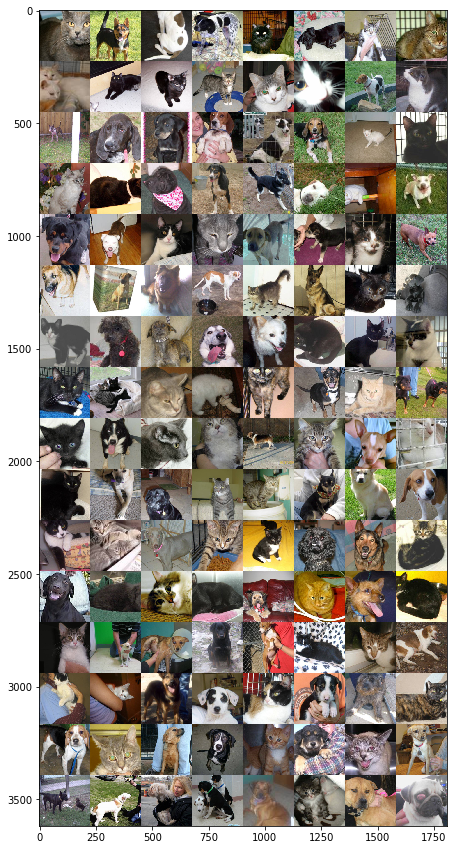

['cats', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'cats', 'dogs', 'cats', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs',

In [5]:
filepath = './train/'

# The CNN assumes standardized in size
batch_size=128



### Transform all 3 channels (RGB) to be mean 0.5 and standard deviation 0.5
### or in other words between 0 and 1
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.RandomCrop(224),     
     transforms.ToTensor(),
     transforms.Normalize((0.5,0.5, 0.5), (0.5,0.5, 0.5))])




train_data = torchvision.datasets.ImageFolder(
	filepath, 
	transform= transform)

### Split into training and validation set here
num_samples = len(train_data.samples)
train_size = int(num_samples * 0.8)
test_size = num_samples - train_size
train, test = random_split(train_data, [train_size, test_size])


train_loader = torch.utils.data.DataLoader(train, 
                                           batch_size= batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test, batch_size= batch_size,
                                           shuffle=True)



plt.figure(figsize=(15,15))
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data_iter = iter(train_loader)
images, labels = data_iter.next()
imshow(torchvision.utils.make_grid(images))

print([ train_data.classes[x] for x in labels ])

In [6]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=6,
                               kernel_size=(3,3),
                               stride=(1,1),
                               padding=1)
        self.pool1 = nn.MaxPool2D(2,2)
        self.conv2 = nn.conv2d(6, 16,5)
        

SyntaxError: positional argument follows keyword argument (<ipython-input-6-e428728e32c9>, line 12)

In [ ]:
data_iter = iter(train_loader)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
    t= time.time()
    
    weights = copy.deepcopy(model.state_dict())
    best_accuracy = 0.0
    
    for epoch in num_epochs: 
        print('Epoch {}/{}'.format(epoch, num_epochs-1))
        print('----------')
        
        model.train() # Set model to training mode
        images, labels = data_iter.next()
        image = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        
        running_loss = 0.0
        running_corrects = 0
        
        with torch.set_grad_enabled(True):
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
        running_loss += loss.item() * images.size(0)
        
        
    model.load_state_dict(weights)

     #   scheduler.step()
        

In [ ]:
(resnet18_model = models.resnet18(pretrained=True)
)

In [ ]:
num_features = resnet18_model.fc.in_features

model_ft.fc = nn.Linear(num_features, )


In [ ]:
data_iter['train']